In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=64ba769c519bb2ddd723f1c4ee3de8c0


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hilo
Processing Record 2 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hervey bay
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | mocuba
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | ampanihy
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | lagoa
Processing Record 13 of Set 1 | djambala
Processing Record 14 of Set 1 | grootfontein
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | taoudenni
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | pilar
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | zyryanka
Processing Record 21 of Set 1 | kachikau
City not 

Processing Record 35 of Set 4 | noumea
Processing Record 36 of Set 4 | taltal
Processing Record 37 of Set 4 | pemangkat
Processing Record 38 of Set 4 | port alfred
Processing Record 39 of Set 4 | meyungs
City not found. Skipping...
Processing Record 40 of Set 4 | coihaique
Processing Record 41 of Set 4 | lons-le-saunier
Processing Record 42 of Set 4 | iqaluit
Processing Record 43 of Set 4 | lolua
City not found. Skipping...
Processing Record 44 of Set 4 | begusarai
Processing Record 45 of Set 4 | butaritari
Processing Record 46 of Set 4 | ust-omchug
Processing Record 47 of Set 4 | batagay-alyta
Processing Record 48 of Set 4 | kalmunai
Processing Record 49 of Set 4 | igra
Processing Record 50 of Set 4 | kudahuvadhoo
Processing Record 1 of Set 5 | benjamin constant
Processing Record 2 of Set 5 | nova olimpia
Processing Record 3 of Set 5 | chokurdakh
Processing Record 4 of Set 5 | georgetown
Processing Record 5 of Set 5 | maniitsoq
Processing Record 6 of Set 5 | tuatapere
Processing Recor

Processing Record 20 of Set 8 | rolla
Processing Record 21 of Set 8 | kapit
Processing Record 22 of Set 8 | suntar
Processing Record 23 of Set 8 | nata
Processing Record 24 of Set 8 | pisco
Processing Record 25 of Set 8 | bathsheba
Processing Record 26 of Set 8 | colares
Processing Record 27 of Set 8 | kostomuksha
Processing Record 28 of Set 8 | campbell river
Processing Record 29 of Set 8 | sao jose da coroa grande
Processing Record 30 of Set 8 | ternovka
Processing Record 31 of Set 8 | puerto princesa
Processing Record 32 of Set 8 | alyangula
Processing Record 33 of Set 8 | ryotsu
Processing Record 34 of Set 8 | qasigiannguit
Processing Record 35 of Set 8 | biltine
Processing Record 36 of Set 8 | prince albert
Processing Record 37 of Set 8 | sao felix do xingu
Processing Record 38 of Set 8 | pampierstad
Processing Record 39 of Set 8 | bolingbrook
Processing Record 40 of Set 8 | nykoping
Processing Record 41 of Set 8 | cherskiy
Processing Record 42 of Set 8 | lashio
Processing Record 

Processing Record 11 of Set 12 | visby
Processing Record 12 of Set 12 | hirara
Processing Record 13 of Set 12 | george
Processing Record 14 of Set 12 | maningrida
Processing Record 15 of Set 12 | puerto leguizamo
Processing Record 16 of Set 12 | garowe
Processing Record 17 of Set 12 | lingsugur
Processing Record 18 of Set 12 | bac
Processing Record 19 of Set 12 | tateyama
Processing Record 20 of Set 12 | pulandian
Processing Record 21 of Set 12 | vercheres
Processing Record 22 of Set 12 | yusva
City not found. Skipping...
Processing Record 23 of Set 12 | cobija
Processing Record 24 of Set 12 | grahamstown
Processing Record 25 of Set 12 | palimbang
Processing Record 26 of Set 12 | tahe
Processing Record 27 of Set 12 | shakhunya
Processing Record 28 of Set 12 | maple creek
Processing Record 29 of Set 12 | nabire
Processing Record 30 of Set 12 | buala
Processing Record 31 of Set 12 | tambura
Processing Record 32 of Set 12 | arroyo
Processing Record 33 of Set 12 | mogadishu
Processing Reco

In [10]:
len(city_data)

541

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hilo,19.7297,-155.0900,78.24,80,75,6.91,US,2021-11-20 18:33:48
1,Rikitea,-23.1203,-134.9692,73.15,64,100,7.96,PF,2021-11-20 18:38:04
2,Hervey Bay,-25.2986,152.8535,68.04,67,73,7.09,AU,2021-11-20 18:38:04
3,Bluff,-46.6000,168.3333,52.52,92,100,6.33,NZ,2021-11-20 18:38:04
4,Mocuba,-16.8392,36.9856,77.25,78,33,8.16,MZ,2021-11-20 18:38:05
5,Albany,42.6001,-73.9662,45.57,56,100,1.99,US,2021-11-20 18:38:05
6,New Norfolk,-42.7826,147.0587,47.75,83,14,2.73,AU,2021-11-20 18:38:05
7,Ampanihy,-24.7000,44.7500,69.87,90,36,8.95,MG,2021-11-20 18:38:05
8,Kapaa,22.0752,-159.3190,79.12,80,40,6.91,US,2021-11-20 18:33:08
9,Lagoa,39.0500,-27.9833,65.21,76,100,25.95,PT,2021-11-20 18:38:06


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-11-20 18:33:48,19.7297,-155.0900,78.24,80,75,6.91
1,Rikitea,PF,2021-11-20 18:38:04,-23.1203,-134.9692,73.15,64,100,7.96
2,Hervey Bay,AU,2021-11-20 18:38:04,-25.2986,152.8535,68.04,67,73,7.09
3,Bluff,NZ,2021-11-20 18:38:04,-46.6000,168.3333,52.52,92,100,6.33
4,Mocuba,MZ,2021-11-20 18:38:05,-16.8392,36.9856,77.25,78,33,8.16
5,Albany,US,2021-11-20 18:38:05,42.6001,-73.9662,45.57,56,100,1.99
6,New Norfolk,AU,2021-11-20 18:38:05,-42.7826,147.0587,47.75,83,14,2.73
7,Ampanihy,MG,2021-11-20 18:38:05,-24.7000,44.7500,69.87,90,36,8.95
8,Kapaa,US,2021-11-20 18:33:08,22.0752,-159.3190,79.12,80,40,6.91
9,Lagoa,PT,2021-11-20 18:38:06,39.0500,-27.9833,65.21,76,100,25.95


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [15]:
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/20/21'

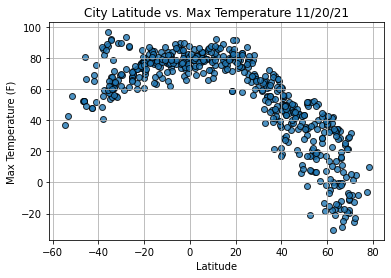

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

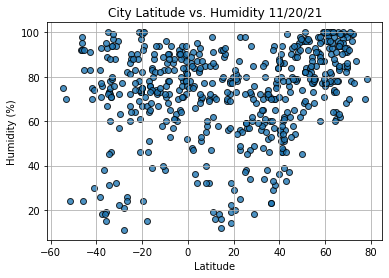

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

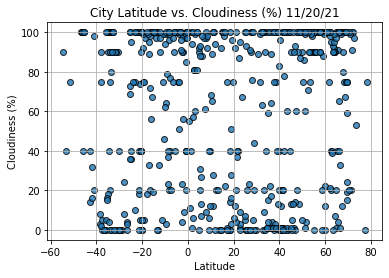

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

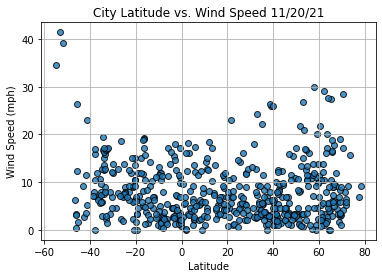

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]
index13

City                    Taoudenni
Country                        ML
Date          2021-11-20 18:38:07
Lat                       22.6783
Lng                       -3.9836
Max Temp                    83.25
Humidity                       25
Cloudiness                     95
Wind Speed                  10.89
Name: 13, dtype: object

In [28]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
536     True
537    False
538     True
539     True
540    False
Name: Lat, Length: 541, dtype: bool

In [29]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hilo,US,2021-11-20 18:33:48,19.7297,-155.0900,78.24,80,75,6.91
5,Albany,US,2021-11-20 18:38:05,42.6001,-73.9662,45.57,56,100,1.99
8,Kapaa,US,2021-11-20 18:33:08,22.0752,-159.3190,79.12,80,40,6.91
9,Lagoa,PT,2021-11-20 18:38:06,39.0500,-27.9833,65.21,76,100,25.95
12,Thompson,CA,2021-11-20 18:35:06,55.7435,-97.8558,19.56,79,90,16.11


In [30]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

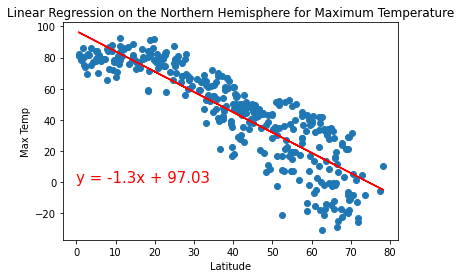

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(0,0))

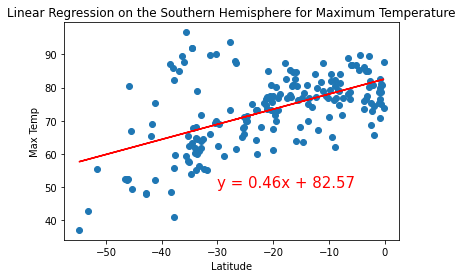

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-30,50))

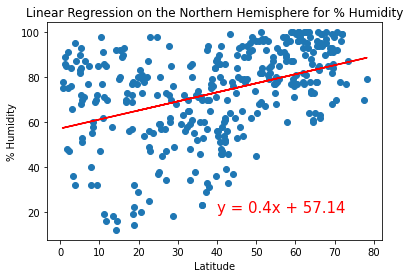

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,20))

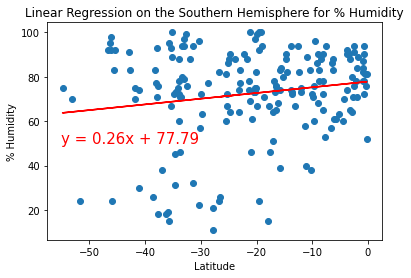

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-55,50))

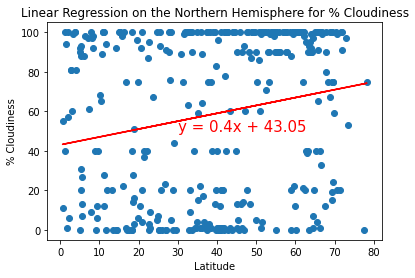

In [46]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(30,50))

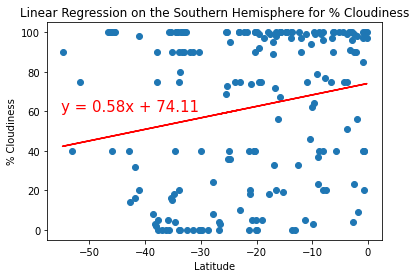

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-55,60))

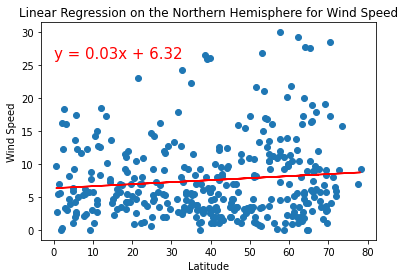

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(0,26))

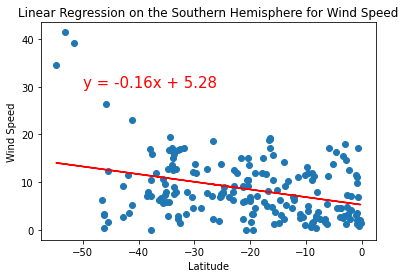

In [50]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,30))